In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/News_data_set.csv')
df.head(100)

,title,description,label
0,Tarique Rahman Returns After 17 Years in Exile,BNP acting chairman Tarique Rahman arrives in ...,politics
1,Tarique Rahman Offers Prayers at Zia's Grave,"After returning home, Tarique visits his fathe...",politics
2,BNP Leaders Hope Tarique's Return Strengthens ...,Party officials say restoring discipline is ke...,politics
3,Tarique Rahman Delivers First Speech in Bangla...,"In his address, Tarique calls for calm, unity,...",politics
4,Fakhrul: New Chapter in Bangladesh Politics Be...,BNP secretary general says Tarique's leadershi...,politics
...,...,...,...
95,SAFF Women's Club Championship Campaign Starts,Tough loss for Bangladeshi side.,sports
96,Golf Tournament Kicks Off in New Year,Prime Bank event attracts players.,sports
97,Basketball: Bangladesh Beats Nepal,Strong start in South Asian Championship.,sports
98,Archery and Other Sports Calendar 2025,Major events lined up.,sports


In [50]:
print(df['label'].value_counts())

label
politics    50
sports      50
Name: count, dtype: int64


In [51]:
# Assign class labels (e.g., 0 = sports, 1 = politics).
label_mapping = {'sports': 0, 'politics': 1}
df['class_label'] = df['label'].map(label_mapping)
print(df['class_label'].value_counts())

class_label
1    50
0    50
Name: count, dtype: int64


In [52]:
#Clean the text: convert to lowercase, remove punctuation, numbers, and extra spaces.
import re
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[\d]', '', text) # Remove numbers
    text = re.sub(r'[.,!?;:"()\[\]{}&*-]', '', text) # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

df['clean_title'] = df['title'].apply(clean_text)
df['clean_description'] = df['description'].apply(clean_text)

display(df[['title', 'clean_title', 'description', 'clean_description']].head())

,title,clean_title,description,clean_description
0,Tarique Rahman Returns After 17 Years in Exile,tarique rahman returns after years in exile,BNP acting chairman Tarique Rahman arrives in ...,bnp acting chairman tarique rahman arrives in ...
1,Tarique Rahman Offers Prayers at Zia's Grave,tarique rahman offers prayers at zia's grave,"After returning home, Tarique visits his fathe...",after returning home tarique visits his father...
2,BNP Leaders Hope Tarique's Return Strengthens ...,bnp leaders hope tarique's return strengthens ...,Party officials say restoring discipline is ke...,party officials say restoring discipline is ke...
3,Tarique Rahman Delivers First Speech in Bangla...,tarique rahman delivers first speech in bangla...,"In his address, Tarique calls for calm, unity,...",in his address tarique calls for calm unity an...
4,Fakhrul: New Chapter in Bangladesh Politics Be...,fakhrul new chapter in bangladesh politics begins,BNP secretary general says Tarique's leadershi...,bnp secretary general says tarique's leadershi...


In [53]:
#Remove stopwords and optionally apply stemming or lemmatization.
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
def remove_stopwords_and_lemmatize(text):
    words = text.split()
    # Remove stopwords
    filtered_words = [word for word in words if word not in english_stopwords]
    # Lemmatize words
    lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmas)

df['clean_title'] = df['clean_title'].apply(remove_stopwords_and_lemmatize)
df['clean_description'] = df['clean_description'].apply(remove_stopwords_and_lemmatize)

display(df[['title', 'clean_title', 'description', 'clean_description']].head())

,title,clean_title,description,clean_description
0,Tarique Rahman Returns After 17 Years in Exile,tarique rahman return year exile,BNP acting chairman Tarique Rahman arrives in ...,bnp acting chairman tarique rahman arrives dha...
1,Tarique Rahman Offers Prayers at Zia's Grave,tarique rahman offer prayer zia's grave,"After returning home, Tarique visits his fathe...",returning home tarique visit father's grave fi...
2,BNP Leaders Hope Tarique's Return Strengthens ...,bnp leader hope tarique's return strengthens u...,Party officials say restoring discipline is ke...,party official say restoring discipline key in...
3,Tarique Rahman Delivers First Speech in Bangla...,tarique rahman delivers first speech bangladesh,"In his address, Tarique calls for calm, unity,...",address tarique call calm unity safe banglades...
4,Fakhrul: New Chapter in Bangladesh Politics Be...,fakhrul new chapter bangladesh politics begin,BNP secretary general says Tarique's leadershi...,bnp secretary general say tarique's leadership...


In [55]:
#Convert the cleaned text into numerical features (e.g., Bag-of-Words or TF-IDF).
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Apply TF-IDF to 'clean_title'
tfidf_title_features = tfidf_vectorizer.fit_transform(df['clean_title'])
print(f"Shape of TF-IDF features for titles: {tfidf_title_features.shape}")

# Apply TF-IDF to 'clean_description'
tfidf_description_features = tfidf_vectorizer.fit_transform(df['clean_description'])
print(f"Shape of TF-IDF features for descriptions: {tfidf_description_features.shape}")

# For simplicity, let's just use the description features for now.
# In a real scenario, you might concatenate or combine these features.
x = tfidf_description_features
y = df['class_label']

print(f"Shape of X (features): {x.shape}")
print(f"Shape of y (labels): {y.shape}")

Shape of TF-IDF features for titles: (100, 321)
Shape of TF-IDF features for descriptions: (100, 396)
Shape of X (features): (100, 396)
Shape of y (labels): (100,)


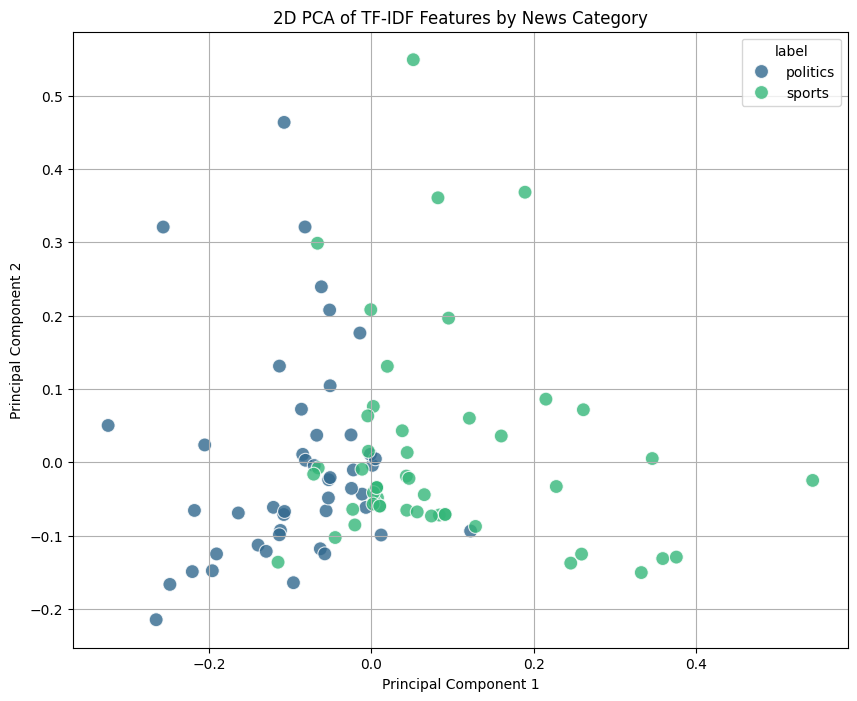

In [56]:

# Reduce dimensions using PCA to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x.toarray()) # Convert sparse matrix to dense array for PCA

# Create a DataFrame for the principal components and add the class labels
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
pca_df['class_label'] = y.reset_index(drop=True)

# Map numerical labels back to original labels for better readability in plot
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
pca_df['label'] = pca_df['class_label'].map(reverse_label_mapping)

# Visualize the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='principal_component_1',
    y='principal_component_2',
    hue='label',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('2D PCA of TF-IDF Features by News Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [57]:
#Split the dataset into train and test sets into 80:20.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 396)
Shape of X_test: (20, 396)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


Accuracy Score: 0.8000


Confusion Matrix:
[[8 2]
 [2 8]]


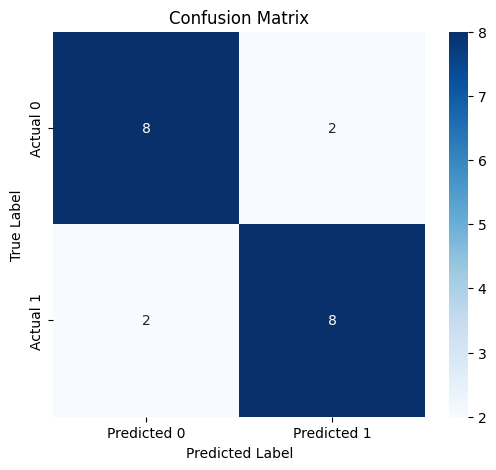

In [59]:

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()